TODO  
Analyze average ofspev rating by year  
Analyze correlation between high attributes and ofspev rating (by house)  

How to categorize the incoming students?  
- Naive first idea: find good year cutoff, do KNN  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
data = pd.read_csv('./dset.csv')
incoming = pd.read_csv('./incoming_class.csv')
data.rename(columns={"Ofstev Rating":"Ofspev Rating","Unnamed: 0":"index"}, inplace=True)
stats= ["Intellect","Integrity","Courage","Reflexes","Patience"]
data.describe()

,index,Intellect,Integrity,Courage,Reflexes,Patience,Ofspev Rating,Year
count,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000
mean,10190.000000,32.531478,32.628196,32.507974,32.690711,32.467295,25.943618,1761.607684
std,5883.054904,16.057066,16.099147,15.942373,16.063804,15.896782,9.865178,145.226868
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1511.000000
25%,5095.500000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,1635.000000
50%,10190.000000,31.000000,32.000000,31.000000,32.000000,31.000000,25.000000,1761.000000
75%,15284.500000,44.000000,44.000000,44.000000,44.000000,44.000000,32.000000,1887.000000
max,20379.000000,79.000000,79.000000,78.000000,79.000000,80.000000,78.000000,2021.000000


In [2]:
data["House"].unique()

array(['Serpentyne', 'Humblescrumble', 'Dragonslayer', 'Thought-Talon'],
      dtype=object)

<Axes: xlabel='Year'>

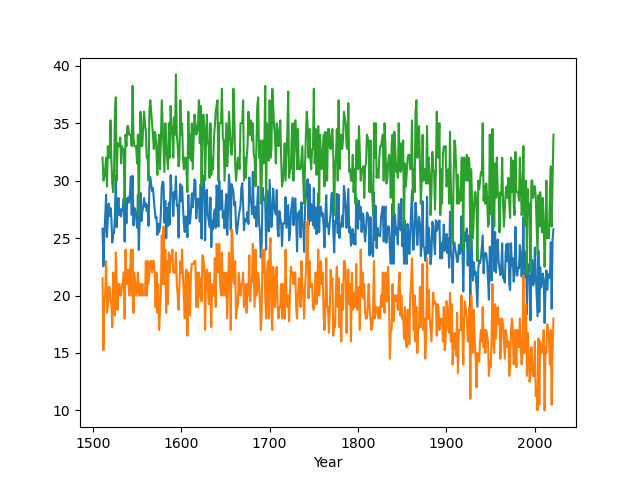

In [3]:
# Ofspev rating by year
fig, ax = plt.subplots()
ax = data.groupby("Year")["Ofspev Rating"].mean().plot()
data.groupby("Year")["Ofspev Rating"].quantile(0.25).plot(ax=ax)
data.groupby("Year")["Ofspev Rating"].quantile(0.75).plot(ax=ax)
#data.groupby("Year")["Ofspev Rating"].max().plot(ax=ax)

In [4]:
# Cutoff at around 1700 for good data
# Max seems to be affected, but less so overall ->? pure assignment-based effect?

<Axes: xlabel='House'>

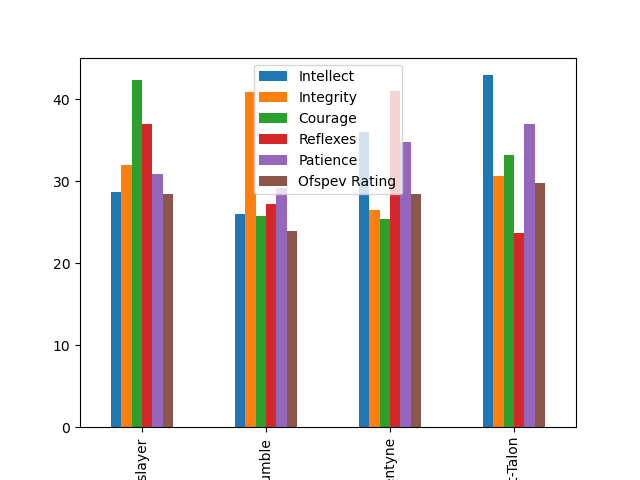

In [5]:
fig, ax = plt.subplots()
good_data = data.query("Year<=1700")
good_data.drop(["Year", "index"], axis=1).groupby("House").mean().plot.bar(ax=ax)

Primary stats by house:
- Dragonslayer: Courage
- Humblescrumble: Integrity
- Serpentyne: Reflexes?
- Thought-talon: Intellect

<Axes: xlabel='Year'>

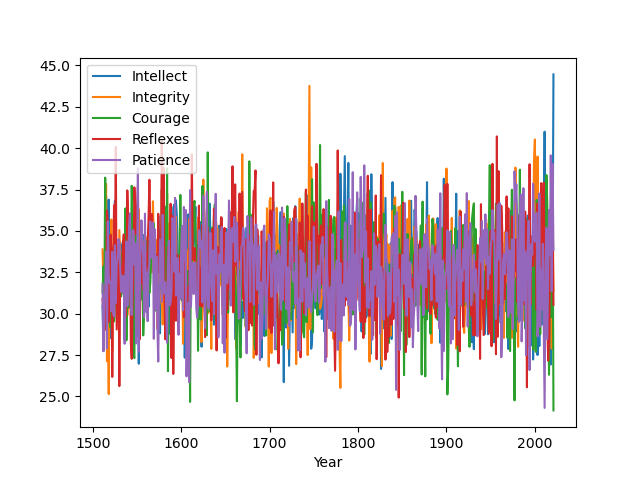

In [6]:
# Just to double check, scores aren't dropping by year right?
fig, ax = plt.subplots()
data.groupby("Year")[stats].mean().plot(ax=ax)

House,Dragonslayer,Humblescrumble,Serpentyne,Thought-Talon
Year,,,,
1511,24,13,10,13
1512,10,16,3,9
1513,13,14,13,4
1514,19,7,5,10
1515,6,14,12,7
...,...,...,...,...
2017,7,4,7,3
2018,6,2,3,3
2019,7,7,2,3


<Axes: xlabel='Year'>

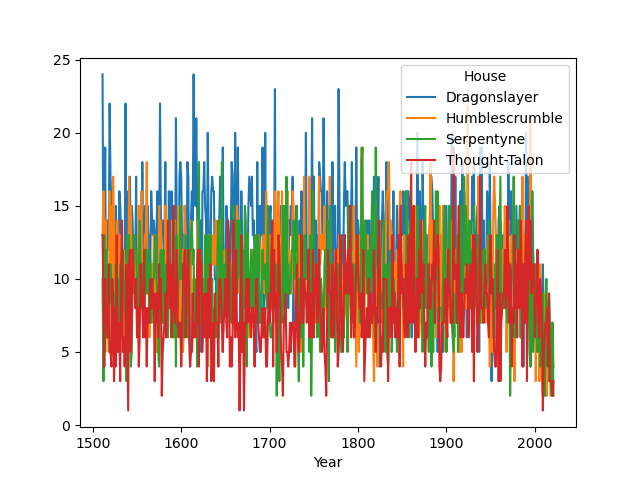

In [7]:
# Checking house sizes by year
fig, ax = plt.subplots()
display(data.groupby(["Year", "House"]).count()["index"].unstack())
data.groupby(["Year", "House"]).count()["index"].unstack().plot(ax=ax)

In [8]:
# Fewer students incoming, neat. Also, no zero year?
data.groupby(["Year", "House"]).count()["index"].unstack().min()

House
Dragonslayer      2
Humblescrumble    2
Serpentyne        2
Thought-Talon     1
dtype: int64

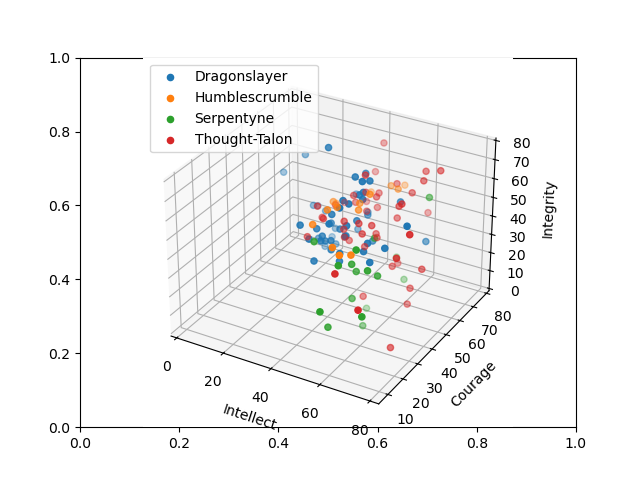

In [9]:
# Trying out a 3d plot for fun
fig, ax = plt.subplots()
ax = fig.add_subplot(projection='3d')
rel = good_data.query("`Ofspev Rating`>=50").groupby("House")[["Intellect","Courage","Integrity"]]
for (house, house_data) in rel:
    ax.scatter(house_data["Intellect"], house_data["Courage"], house_data["Integrity"], label=house)
ax.set_xlabel("Intellect")
ax.set_ylabel("Courage")
ax.set_zlabel("Integrity")
ax.legend()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X = good_data[stats]
Y = good_data["House"]
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

clf.set_params(knn__weights="distance").fit(X,Y)
pred = incoming.drop(["Student","Year"], axis=1)
pred1 = clf.predict(pred)
display(pred1)

array(['Thought-Talon', 'Humblescrumble', 'Serpentyne', 'Dragonslayer',
       'Humblescrumble', 'Serpentyne', 'Dragonslayer', 'Dragonslayer',
       'Humblescrumble', 'Thought-Talon', 'Dragonslayer',
       'Humblescrumble', 'Humblescrumble', 'Dragonslayer',
       'Thought-Talon', 'Humblescrumble', 'Dragonslayer',
       'Humblescrumble', 'Thought-Talon', 'Humblescrumble'], dtype=object)

In [11]:
X = data[stats]
Y = data["House"]
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

clf.set_params(knn__weights="distance").fit(X,Y)
pred = incoming.drop(["Student","Year"], axis=1)
clf.predict(pred)

array(['Thought-Talon', 'Thought-Talon', 'Serpentyne', 'Dragonslayer',
       'Humblescrumble', 'Serpentyne', 'Dragonslayer', 'Dragonslayer',
       'Humblescrumble', 'Thought-Talon', 'Serpentyne', 'Humblescrumble',
       'Humblescrumble', 'Dragonslayer', 'Thought-Talon', 'Serpentyne',
       'Dragonslayer', 'Humblescrumble', 'Thought-Talon',
       'Humblescrumble'], dtype=object)

In [12]:
# Do same inputs result in the same score?
def custom_round(x, base=3):
    return int(base * round(float(x)/base))
rounded = data[stats].map(custom_round).sort_values(stats)
neighbours = rounded[rounded.duplicated(keep=False)==True]
#data[rounded.duplicated(keep=False) == True].sort_values(stats)
pd.set_option('display.max_rows', None)
display(data.loc[neighbours.index])
pd.set_option('display.max_rows', 20)

,index,Intellect,Integrity,Courage,Reflexes,Patience,House,Ofspev Rating,Year
4263,4264,3,15,53,17,28,Dragonslayer,21,1615
15034,15035,4,15,53,19,27,Serpentyne,8,1881
6627,6628,5,22,9,28,36,Humblescrumble,14,1674
18620,18621,5,21,9,26,35,Humblescrumble,16,1970
8457,8458,9,12,21,40,24,Humblescrumble,15,1720
13275,13276,8,11,20,39,24,Humblescrumble,17,1837
7061,7062,10,22,26,16,11,Humblescrumble,14,1685
16453,16454,9,20,28,14,13,Dragonslayer,18,1916
2038,2039,9,42,42,45,38,Dragonslayer,24,1560
16413,16414,8,42,43,44,39,Dragonslayer,30,1915


In [13]:
#15774	15775	49	20	44	27	38	Thought-Talon	29	1899
#16009	16010	47	20	46	28	39	Thought-Talon	45	1905
display(data.query("Year == 1899 and House == 'Thought-Talon'"))
display(data.query("Year == 1905 and House == 'Thought-Talon'"))

,index,Intellect,Integrity,Courage,Reflexes,Patience,House,Ofspev Rating,Year
15741,15742,40,15,22,31,21,Thought-Talon,16,1899
15743,15744,43,52,28,12,42,Thought-Talon,29,1899
15751,15752,41,53,62,8,18,Thought-Talon,16,1899
15758,15759,43,44,62,17,43,Thought-Talon,35,1899
15760,15761,48,26,56,26,39,Thought-Talon,32,1899
15761,15762,33,17,46,7,34,Thought-Talon,13,1899
15764,15765,47,32,29,33,28,Thought-Talon,21,1899
15772,15773,48,47,19,47,50,Thought-Talon,44,1899
15774,15775,49,20,44,27,38,Thought-Talon,29,1899
15775,15776,22,3,21,39,41,Thought-Talon,15,1899


,index,Intellect,Integrity,Courage,Reflexes,Patience,House,Ofspev Rating,Year
15988,15989,13,21,21,38,36,Thought-Talon,10,1905
16001,16002,48,64,32,5,42,Thought-Talon,38,1905
16002,16003,49,22,7,29,11,Thought-Talon,10,1905
16009,16010,47,20,46,28,39,Thought-Talon,45,1905
16010,16011,33,57,42,26,43,Thought-Talon,42,1905
16015,16016,45,51,39,36,64,Thought-Talon,41,1905
16016,16017,5,17,38,38,25,Thought-Talon,3,1905


In [14]:
# Theory: class size matters for Thought-Talon - debunked
t = data.query("House == 'Thought-Talon'").groupby("Year").count()[["House"]]
t["avg_score"] = data.query("House == 'Thought-Talon'").groupby("Year")[["Ofspev Rating"]].max()
display(t)
display(t.groupby("House").max())
t.groupby("House").describe()

,House,avg_score
Year,,
1511,13,41
1512,9,33
1513,4,39
1514,10,47
1515,7,44
...,...,...
2017,3,53
2018,3,32
2019,3,9


,avg_score
House,
1,41
2,41
3,55
4,65
5,64
6,59
7,61
8,64
9,64


avg_score                                                      
          count       mean        std   min    25%   50%    75%   max
House                                                                
1           4.0  27.250000  16.090888   4.0  24.25  32.0  35.00  41.0
2           4.0  29.500000  10.661457  16.0  24.25  30.5  35.75  41.0
3          17.0  39.000000  11.241664   9.0  34.00  37.0  46.00  55.0
4          33.0  38.363636   9.283110  20.0  32.00  38.0  45.00  65.0
5          32.0  43.687500   8.494543  29.0  37.75  43.0  48.25  64.0
6          63.0  41.825397   7.065454  27.0  37.00  41.0  47.00  59.0
7          83.0  41.975904   8.735931  23.0  36.00  42.0  47.00  61.0
8          60.0  43.033333   7.611247  21.0  39.00  42.0  46.25  64.0
9          57.0  43.000000   7.678821  26.0  37.00  43.0  48.00  64.0
10         51.0  43.901961   7.798089  28.0  39.00  44.0  47.00  69.0
11         38.0  46.210526  10.280283  30.0  38.00  43.5  50.75  78.0
12         31.0  45.645161   6.205097  32.0  40.50  47.0  49.00  57.0
13         17.0  47.647059   7.623493  37.0  41.00  49.0  51.00  66.0
14         11.0  47.090909   6.920326  36.0  42.50  48.0  51.00  61.0
15          7.0  43.142857   4.140393  37.0  40.50  43.0  46.50  48.0
17          1.0  42.000000        NaN  42.0  42.00  42.0  42.00  42.0
18          1.0  59.000000        NaN  59.0  59.00  59.0  59.00  59.0
19          1.0  65.000000        NaN  65.0  65.00  65.0  65.00  65.0

In [27]:
# Try to do linear regression by house
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor 
reg = GradientBoostingRegressor(random_state=0)
inc_pred = incoming
for (house, house_data) in data.groupby("House"):
    print(house)
    reg.fit(house_data[stats], house_data["Ofspev Rating"])
    pred=reg.predict(incoming[stats])
    display(pred)
    inc_pred[house] = pred
pred2 = incoming[["Dragonslayer", "Humblescrumble", "Serpentyne", "Thought-Talon"]].idxmax(axis=1)
display(pred2)

Dragonslayer


array([25.75609084, 10.70787579, 14.24723031, 18.51499291, 13.66194724,
       24.44173895, 23.63556807, 18.20262676,  3.22967026,  8.71328443,
       24.73075694, 18.72048918, 20.66076995, 20.50406002,  5.66762022,
        5.03446809, 31.6797256 , 20.15488496, 13.01297094, 11.29984403])

Humblescrumble


array([28.56869095, 14.82694225, 20.27898094, 14.04149975, 18.24061572,
       21.76400558, 16.29434329, 14.19626765, 14.42917553, 16.17364876,
       15.48641846, 22.33009009, 25.92720753, 14.98312243, 15.01617844,
       21.87293312, 28.88490878, 40.50569148, 19.64426369, 28.91200291])

Serpentyne


array([18.60434069, 12.47142436, 29.56564375,  5.52399951,  7.38042355,
       34.908351  , 19.28201689,  9.28421185, 11.71584383, 16.85206695,
       22.67854623, 11.7256365 , 19.50906877, 14.1013193 , 14.05279009,
       21.22954954, 24.64613039, 18.04355449, 26.17254203, 19.0410567 ])

Thought-Talon


array([36.2999941 , 16.88202291, 24.4300482 ,  4.39659835, 16.03151974,
       33.49274255, 11.91065051,  7.44414172,  5.61984494, 26.19557955,
       21.73054251,  7.94063472, 17.47940138, 11.82497949, 20.21862402,
       11.78981288, 31.15216186, 27.51256512, 29.57873268, 22.99478741])

0      Thought-Talon
1      Thought-Talon
2         Serpentyne
3       Dragonslayer
4     Humblescrumble
5         Serpentyne
6       Dragonslayer
7       Dragonslayer
8     Humblescrumble
9      Thought-Talon
10      Dragonslayer
11    Humblescrumble
12    Humblescrumble
13      Dragonslayer
14     Thought-Talon
15    Humblescrumble
16      Dragonslayer
17    Humblescrumble
18     Thought-Talon
19    Humblescrumble
dtype: object

In [28]:
pred1

array(['Thought-Talon', 'Humblescrumble', 'Serpentyne', 'Dragonslayer',
       'Humblescrumble', 'Serpentyne', 'Dragonslayer', 'Dragonslayer',
       'Humblescrumble', 'Thought-Talon', 'Dragonslayer',
       'Humblescrumble', 'Humblescrumble', 'Dragonslayer',
       'Thought-Talon', 'Humblescrumble', 'Dragonslayer',
       'Humblescrumble', 'Thought-Talon', 'Humblescrumble'], dtype=object)

In [29]:
inc_copy=incoming
inc_copy["pred1"] = pred1
inc_copy["pred2"] = pred2

In [30]:
display(inc_copy)

,Student,Intellect,Integrity,Courage,Reflexes,Patience,Year,Dragonslayer,Humblescrumble,Serpentyne,Thought-Talon,pred1,pred2
0,A,34,52,46,18,33,2022,25.756091,28.568691,18.604341,36.299994,Thought-Talon,Thought-Talon
1,B,22,13,19,10,25,2022,10.707876,14.826942,12.471424,16.882023,Humblescrumble,Thought-Talon
2,C,33,11,18,46,46,2022,14.247230,20.278981,29.565644,24.430048,Serpentyne,Serpentyne
3,D,6,21,47,17,23,2022,18.514993,14.041500,5.524000,4.396598,Dragonslayer,Dragonslayer
4,E,19,33,38,9,17,2022,13.661947,18.240616,7.380424,16.031520,Humblescrumble,Humblescrumble
5,F,48,6,33,30,54,2022,24.441739,21.764006,34.908351,33.492743,Serpentyne,Serpentyne
6,G,17,10,39,54,32,2022,23.635568,16.294343,19.282017,11.910651,Dragonslayer,Dragonslayer
7,H,39,20,52,16,6,2022,18.202627,14.196268,9.284212,7.444142,Dragonslayer,Dragonslayer
8,I,9,11,6,30,25,2022,3.229670,14.429176,11.715844,5.619845,Humblescrumble,Humblescrumble
9,J,50,27,7,11,30,2022,8.713284,16.173649,16.852067,26.195580,Thought-Talon,Thought-Talon
